In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
th_users=pd.read_csv('takehome_users_new.csv', parse_dates=['creation_time'])

In [3]:
th_users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:00,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:00,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:00,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:00,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:00,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [4]:
user_eng=pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])

In [5]:
user_eng
user_eng.columns

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven day  period ,  identify  which  factors  predict  future  user
adoption

In [6]:
user_eng['week'] = user_eng['time_stamp'].dt.week
user_eng = user_eng.groupby(['week','user_id'])['time_stamp'].count().reset_index(name="freq")
#result = user_eng[user_eng.freq >= 3]
#user_ids = result.user_id.tolist()
#print(user_ids)

/var/folders/72/l8d7bbws01j_xs9lr2npbw6h0000gn/T/ipykernel_91279/1024751242.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  user_eng['week'] = user_eng['time_stamp'].dt.week


In [7]:
user_eng.head(10)

,week,user_id,freq
0,1,2,1
1,1,10,5
2,1,42,4
3,1,43,1
4,1,46,1
5,1,63,7
6,1,69,10
7,1,81,3
8,1,82,4
9,1,87,4


In [8]:
def conditions(s):
    if s['freq']>=3:
        return 1
    else:
        return 0
user_eng['user'] = user_eng.apply(conditions, axis=1)

In [9]:
user_eng.head(10)

,week,user_id,freq,user
0,1,2,1,0
1,1,10,5,1
2,1,42,4,1
3,1,43,1,0
4,1,46,1,0
5,1,63,7,1
6,1,69,10,1
7,1,81,3,1
8,1,82,4,1
9,1,87,4,1


In [10]:
df=pd.merge(th_users, user_eng, left_on='object_id', right_on='user_id')
df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week,user_id,freq,user
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,17,1,1,0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,2,1,0
2,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,2,1,0
3,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,6,2,3,1
4,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,7,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57167,11996,2013-09-06 06:14:00,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,36,11996,1,0
57168,11997,2013-01-10 18:28:00,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,3,11997,1,0
57169,11998,2014-04-27 12:45:00,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,17,11998,1,0
57170,11999,2012-05-31 11:55:00,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,22,11999,1,0


In [11]:
df.isna().sum()

object_id                         0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time        0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            24982
week                              0
user_id                           0
freq                              0
user                              0
dtype: int64

In [12]:
#Prep data for modeling by removing unecessary features
df= df.drop([ 'name', 'email','last_session_creation_time','freq','week'],axis=1)
date_feature = df.pop('creation_time')
df.head()


,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,user
0,1,GUEST_INVITE,1,0,11,10803.0,1,0
1,2,ORG_INVITE,0,0,1,316.0,2,0
2,2,ORG_INVITE,0,0,1,316.0,2,0
3,2,ORG_INVITE,0,0,1,316.0,2,1
4,2,ORG_INVITE,0,0,1,316.0,2,0


In [13]:
df['invited_by_user_id'] = df['invited_by_user_id'].fillna(0)

In [14]:
df['invited_by_user_id'] = df['invited_by_user_id'].apply(
        lambda x: 1 if x!=0 else 0)
df = pd.get_dummies(data=df,columns=['creation_source'])

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


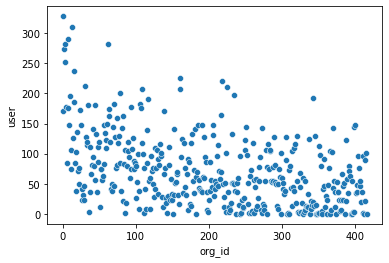

In [15]:
org = df.groupby('org_id').sum()
sns.scatterplot(org.index,org.user)
plt.show()

In [16]:
org_cata = []
for i in df['org_id']:
    cata = org.loc[i,'user']
    org_cata.append(cata)
df['org_id'] = org_cata

df = pd.get_dummies(data=df,columns=['org_id'])
df.head()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,user_id,user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,org_id_213,org_id_221,org_id_225,org_id_238,org_id_252,org_id_273,org_id_282,org_id_291,org_id_310,org_id_328
0,1,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,1,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,1,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,0,1,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
df.columns

Index(['object_id', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'invited_by_user_id', 'user_id', 'user', 'creation_source_GUEST_INVITE',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP',
       ...
       'org_id_213', 'org_id_221', 'org_id_225', 'org_id_238', 'org_id_252',
       'org_id_273', 'org_id_282', 'org_id_291', 'org_id_310', 'org_id_328'],
      dtype='object', length=173)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,train_test_split

y = df.pop('user')
x =df

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25,random_state=42)

In [21]:
graboost = GradientBoostingClassifier(max_features='sqrt')
parametergra = {'n_estimators':[40,45,50,55,60],'learning_rate':[.01,0.02,0.03,0.04,0.05],
              'max_depth':[1,2,3,4,5]}
grid1 = GridSearchCV(estimator=graboost,param_grid=parametergra,
                     scoring='accuracy',cv=5)
grid1.fit(x_train,y_train)
best_para_gra = grid1.best_params_
best_acc_gra = grid1.best_score_

print('The Tuned Paratmers :\n',best_para_gra,'\nAchieved %s Percent Accuracy' %(best_acc_gra*100))

The Tuned Paratmers :
 {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 60} 
Achieved 58.44818273791393 Percent Accuracy


In [23]:
gbm = GradientBoostingClassifier(max_features='sqrt',
                                 n_estimators=45,learning_rate=.05,max_depth= 3)
gbm.fit(x_train,y_train)
feature_coef = pd.DataFrame(gbm.feature_importances_).transpose()
feature_coef.columns = list(df.columns)
feature_coef.index = ['GBM'] 
feature_coef.transpose().sort_values(by='GBM',ascending=False).head(20)

,GBM
org_id_0,0.132980
org_id_2,0.092562
org_id_12,0.070690
org_id_3,0.061784
org_id_4,0.047972
org_id_7,0.047167
org_id_8,0.044162
org_id_1,0.039814
org_id_41,0.039400
org_id_14,0.029082


org_id_o and 2 have the most active users